# Vision
This is a dev file for the vision module

### 1- Importing necessary librairies

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

### 2- Camera Calibration (Removing distortions)
Based on this OpenCV [tutorial](https://docs.opencv.org/4.x/da/d13/tutorial_aruco_calibration.html) 

Load images of different board viewpoints from webcam and detect charuco markers

[[1101.   849.5]]
[[1025.5  847. ]]
[[1021.53534  835.053  ]]
[[1353.5721   279.03284]]
Camera matrix:
[  1526.7963138822204	0.0	940.6659506565472
0.0	1530.381746597683	531.7768073331088
0.0	0.0	1.0  ]


,k1,k2,p1,p2,k3
0,0.193274,-1.204433,0.009637,-0.001246,3.154492


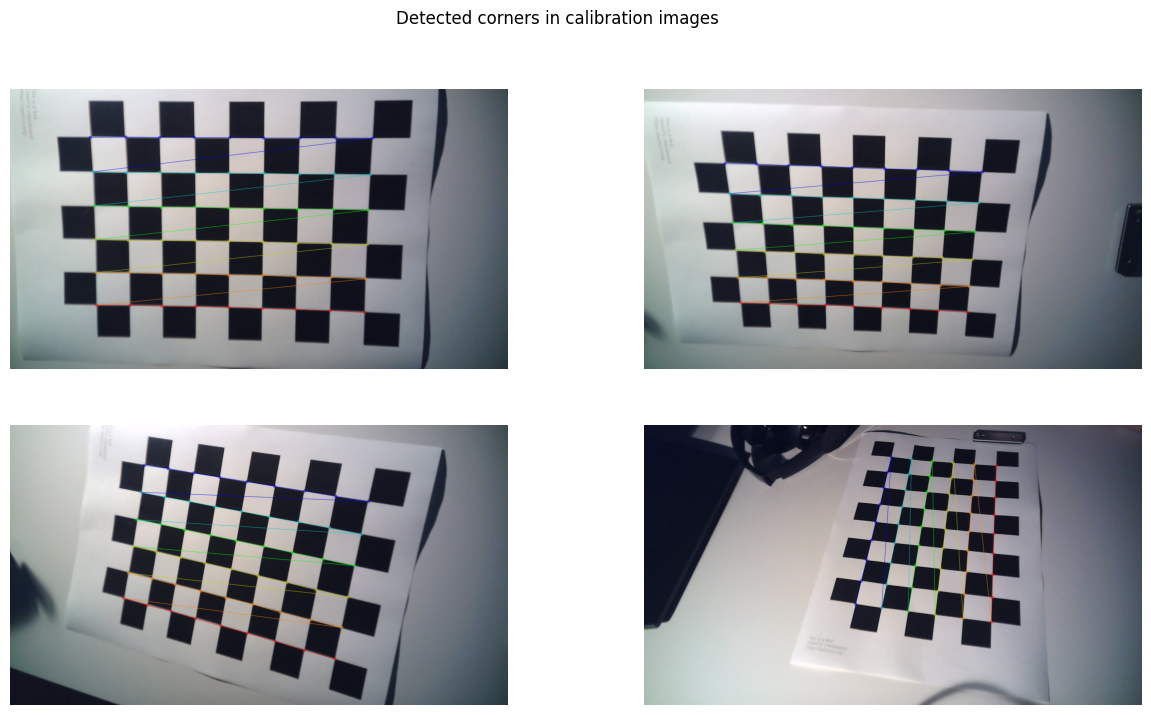

In [5]:
IMG_NUM = 4
SQUARE_SIZE = 25 #mm
filenames = [f'cal_{i}.jpg' for i in range(IMG_NUM)]
image_points_list = list()
obj_points_list = list()
fig, axs = plt.subplots(2,2)
fig.set_size_inches(15,8)
fig.suptitle('Detected corners in calibration images')
# Termination criteria
term_crit = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 30, 0.001)
objp = np.zeros((9*6,3), np.float32)
objp[:,:2] = np.mgrid[0:9,0:6].T.reshape(-1,2)
objp *= SQUARE_SIZE

for i in range(IMG_NUM):
    im = cv2.imread(f'images/{filenames[i]}')
    ret, corners = cv2.findChessboardCorners(im, (9,6), cv2.CALIB_CB_FAST_CHECK + cv2.CALIB_CB_ADAPTIVE_THRESH)
    print(corners[2])
    if ret:
        obj_points_list.append(objp)
        img_points = cv2.cornerSubPix(cv2.cvtColor(im, cv2.COLOR_BGR2GRAY), corners, (3,3), (-1,-1), term_crit)
        image_points_list.append(img_points)
        im_markers = cv2.drawChessboardCorners(im, (9,6), img_points, ret)
        axs[(int)(i/2), i % 2].imshow(im_markers[:,:,::-1])
        axs[(int)(i/2), i % 2].axis('off')

# Perform calibration and obtain cam matrices
h, w = im.shape[:2]
ret, cam_mat, dist_mat, rvecs, tvecs = cv2.calibrateCamera(obj_points_list, image_points_list, (w,h), None, None)
print('Camera matrix:\n[ ','\n'.join(['\t'.join([str(cell) for cell in row]) for row in cam_mat]), ' ]')
df = pd.DataFrame(dist_mat, columns=['k1', 'k2', 'p1', 'p2', 'k3'])
df = df.style.set_caption('Distortion params')
display(df)

np.savez('files/calib_params', cam_mat, dist_mat, rvecs, tvecs)

# Projection error
#mean = 0
#for i in range(len(obj_points_list[0])):
#    pts, _ = cv2.projectPoints(obj_points_list[0][i], rvecs[i], tvecs[i], cam_mat, dist_mat)
#    error = cv2.norm(image_points_list[0][i], pts, cv2.NORM_L2)/len(pts)
#    mean += error

#print('Mean projection error: %.2f' % mean)




iv. Apply the correction to the image

(55, 56, 1795, 959)


(-0.5, 1794.5, 958.5, -0.5)

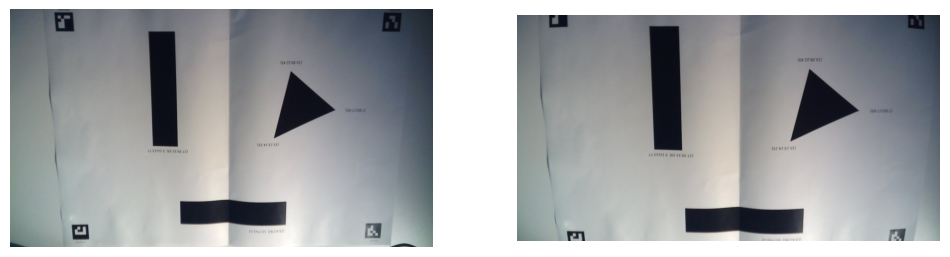

In [7]:
test_img = cv2.imread("images/calibration_test.jpg")
# Get optimal camera matrix to keep img dimension the same
h, w = test_img.shape[:2]
new_cam_mat, roi = cv2.getOptimalNewCameraMatrix(cam_mat, dist_mat, (w,h), 1, (w,h), 0)
print(roi)
x,y,w,h = roi

# Using remapping
#mapx, mapy = cv2.initUndistortRectifyMap(cam_mat, dist_mat, None, new_cam_mat, (w,h), 5)
#test_img_corr = cv2.remap(test_img, mapx, mapy, cv2.INTER_LINEAR)

fig, axs = plt.subplots(1,2)
fig.set_size_inches(12,4)
axs[0].imshow(cv2.cvtColor(test_img, cv2.COLOR_BGR2RGB))
axs[0].axis('off')

test_img_corr = cv2.undistort(test_img, cam_mat, dist_mat, None, new_cam_mat)
#axs[1].imshow(test_img_corr[y:y+h,x:x+w,::-1])
axs[1].imshow(test_img_corr[y:y+h,x:x+w,::-1])
axs[1].axis('off')


**OLD STUFF**

Camera matrix:
[  1526.5042690711055	0.0	977.8557186100905
0.0	1527.057249585488	511.9432544826933
0.0	0.0	1.0  ]


,k1,k2,p1,p2,k3
0,0.469446,-6.053361,-0.002009,0.006595,27.433906


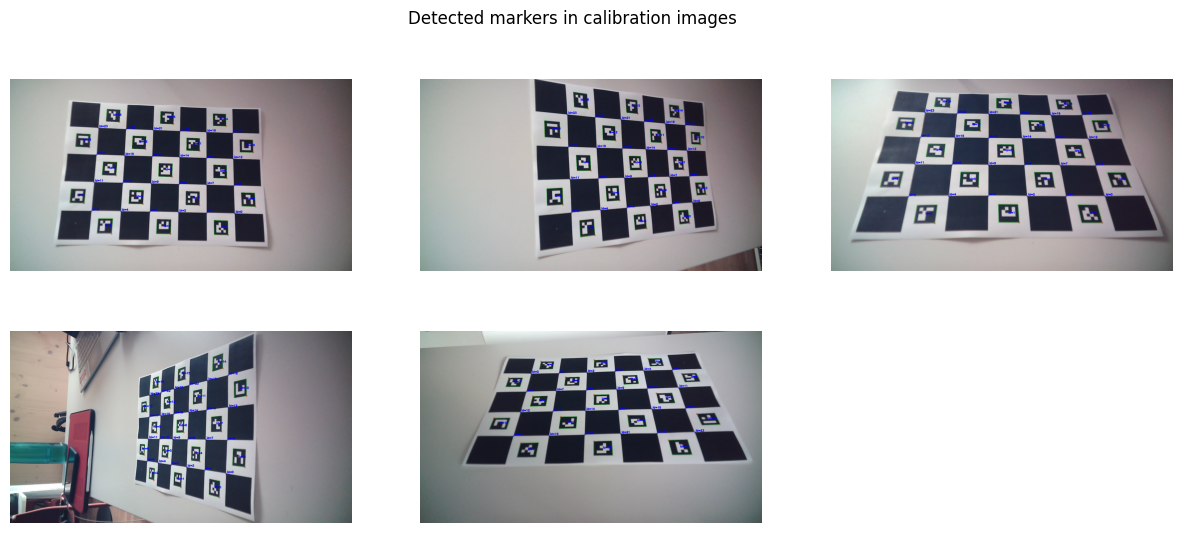

In [ ]:
filenames = [f'img_cal_{i}.jpg' for i in range(5)]
image_points_list = list()
obj_points_list = list()
detector = cv2.aruco.CharucoDetector(charucoBoard)
fig, axs = plt.subplots(2,3)
fig.set_size_inches(15,6)
fig.suptitle('Detected markers in calibration images')
axs[1,2].axis('off')

for i in range(5):
    im = cv2.imread(f'ArucoTags/{filenames[i]}')
    corners, ids, m_corners, m_ids = detector.detectBoard(im)
    obj_points,img_points = charucoBoard.matchImagePoints(corners, ids)
    image_points_list.append(img_points)
    obj_points_list.append(obj_points)
    im_markers = cv2.aruco.drawDetectedMarkers(im, m_corners, m_ids)
    im_markers = cv2.aruco.drawDetectedCornersCharuco(im_markers, corners, ids)
    axs[(int)(i/3), i % 3].imshow(im_markers[:,:,::-1])
    axs[(int)(i/3), i % 3].axis('off')

# Perform calibration and obtain cam matrices
h, w = im.shape[:2]
ret, cam_mat, dist_mat, rvecs, tvecs = cv2.calibrateCamera(obj_points_list, image_points_list, (w,h), None, None)
print('Camera matrix:\n[ ','\n'.join(['\t'.join([str(cell) for cell in row]) for row in cam_mat]), ' ]')
df = pd.DataFrame(dist_mat, columns=['k1', 'k2', 'p1', 'p2', 'k3'])
df = df.style.set_caption('Distortion params')
display(df)

# Projection error
#mean = 0
#for i in range(len(obj_points_list[0])):
#    pts, _ = cv2.projectPoints(obj_points_list[0][i], rvecs[i], tvecs[i], cam_mat, dist_mat)
#    error = cv2.norm(image_points_list[0][i], pts, cv2.NORM_L2)/len(pts)
#    mean += error

#print('Mean projection error: %.2f' % mean)




### 3- Marker pose detection
i. Identify aruco markers in camera feed

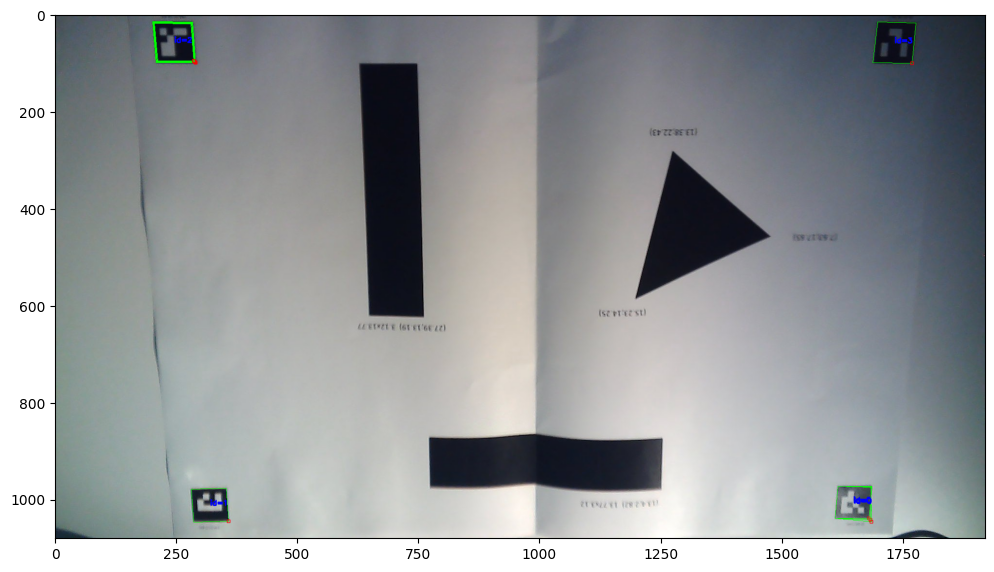

In [125]:
ORIGIN_ID = 1
detector = cv2.aruco.ArucoDetector(cv2.aruco.getPredefinedDictionary(cv2.aruco.DICT_4X4_50))
corners, ids, rejected = detector.detectMarkers(test_img)
img_detection = cv2.aruco.drawDetectedMarkers(test_img, corners, ids)


fig = plt.figure(figsize=(12,8))
plt.imshow(img_detection[:,:,::-1])

ii. Find position and orientation of markers

In [ ]:
cv2.aru

In [5]:
cam_stream = cv2.VideoCapture(0)

while True:
    # Capture frame-by-frame
    ret, frame = cam_stream.read()
    # if frame is read correctly ret is True
    if not ret:
        print("Can't receive frame (stream end?). Exiting ...")
        break
    # Our operations on the frame come here
    #gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    # Display the resulting frame
    cv2.imshow('frame', frame)
    if cv2.waitKey(1) == ord('q'):
        break

In [6]:
cam_stream.release()
cv2.destroyAllWindows()